In [1]:
import selenium as sl
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import seaborn as sns

In [43]:
driver = webdriver.Firefox(executable_path='/home/shade/Personal_dev/geckodriver-v0.26.0-linux64/geckodriver')
driver.maximize_window()
driver.get("https://www.runtouravianca.com/resultados.php")

iframe = driver.find_element_by_css_selector('iframe')
driver.switch_to_frame(iframe)

numero_competencia = []
p_general = []
p_grupo = []
tiempo = []
tiempo_chip = []
categoria = []
genero = []

for i in range(11150,12000):
    try:
        WebDriverWait(driver, 1).until(EC.alert_is_present(),
                                   'Timed out waiting for PA creation ' +
                                   'confirmation popup to appear.')
        
        alert = driver.switch_to.alert
        alert.dismiss()
    except:
        print('notificacion')
        
    driver.find_element_by_id('numero').clear()
    print (i+1)
    driver.find_element_by_id('numero').send_keys("{}".format(i+1))
    driver.find_element_by_id('buscar').click()
    
    try:
        WebDriverWait(driver, 1).until(EC.alert_is_present(),
                                   'Timed out waiting for PA creation ' +
                                   'confirmation popup to appear.')
        
        alert = driver.switch_to.alert
        alert.dismiss()
        next
    except:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        tabla = soup.findAll('table')
        datos = tabla[0].findAll('td')

        driver.execute_script("window.history.go(-1)")

        numero_competencia.append(i+1)
        p_general.append(datos[3].text)
        p_grupo.append(datos[5].text)
        tiempo.append(datos[7].text)
        tiempo_chip.append(datos[9].text)
        categoria.append(datos[11].text)
        genero.append(datos[13].text)


/home/shade/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use driver.switch_to.frame instead
  


notificacion
11151
notificacion
11152
notificacion
11153
notificacion
11154
notificacion
11155
notificacion
11156
notificacion
11157
notificacion
11158
notificacion
11159
notificacion
11160
notificacion
11161
notificacion
11162
notificacion
11163
notificacion
11164
notificacion
11165
notificacion
11166
notificacion
11167
notificacion
11168
notificacion
11169
notificacion
11170
notificacion
11171
notificacion
11172
notificacion
11173
notificacion
11174
notificacion
11175
notificacion
11176
notificacion
11177
notificacion
11178
notificacion
11179
notificacion
11180
notificacion
11181
notificacion
11182
notificacion
11183
notificacion
11184
notificacion
11185
notificacion
11186
notificacion
11187
notificacion
11188


WebDriverException: Message: Failed to decode response from marionette


In [ ]:
driver.find_element_by_id('numero').clear()

In [ ]:
driver.find_element_by_id('numero').send_keys("{}".format(i+1))

In [ ]:
p_general

In [37]:
data = pd.DataFrame(zip(numero_competencia, p_general, p_grupo, tiempo, tiempo_chip, categoria, genero), columns=['Numero_compentencia','Posicion_general','Posicion_grupo','Tiempo_carrera','Tiempo_chip','Categoria','Genero'])

In [40]:
data['Numero_compentencia'].max()

11525

In [41]:
data.to_csv('registros_11151_to_11525.csv')

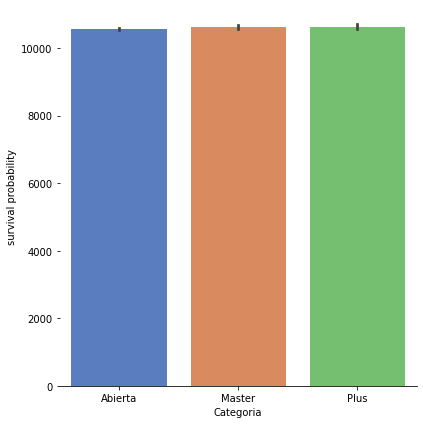

In [31]:
g = sns.catplot(x='Categoria', y='Numero_compentencia', data=data,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")